### Discretização ###

- gerar intervalos para lidar com valores contínuos

- Definição formal: criar um novo atributo discreto a partir de um atributo contínuo

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados = pd.read_csv('dados/municipios_mba.csv')

In [3]:
dados.dtypes

gid                  int64
UF                  object
nome                object
Censo              float64
PIB                float64
pop                  int64
classe               int64
desemprego         float64
pop_sanea          float64
expec_vida         float64
pobreza            float64
IDH                  int64
urbaniz             object
dens_pop_urbana     object
dtype: object

In [4]:
dados['expec_vida'].unique()

array([73.6, 74.2, 75.3, 73.4, 75.4, 72.6, 72.5, 74.6, 73.3, 74.8, 74.9,
       74.1, 73.7, 75.2, 73.1, 72. , 72.8, 71.8, 70.6, 70.7, 73.5, 72.7,
       71.7, 70.5, 71.4, 71.3, 71.1, 72.4, 71.9, 73. , 70.9, 73.2, 71.6,
       72.1, 71. , 72.2, 70.8, 71.5, 72.9, 71.2, 73.8, 75. , 74.3, 74.4,
       74. , 72.3, 75.1, 73.9, 74.7, 74.5, 75.6, 75.5, 79.3, 78. , 77.8,
       77.2, 78.6, 79. , 78.4, 77.1, 79.4, 78.3, 77.5, 77.9, 78.5, 77.3,
       77. , 79.8, 79.1, 77.6, 79.6, 79.5, 77.7, 79.7, 77.4, 78.8, 79.2,
       78.7, 80. , 78.1, 78.2, 78.9, 75.7, 75.8, 68.7, 68.9, 68.8, 70.2,
       69.1, 69. , 70.3, 69.8, 70.4, 69.5, 68.6, 69.7, 69.6, 70.1, 69.9,
       69.4, 69.2, 70. , 69.3, 68.5, 75.9, 76. , 76.4, 76.6, 76.2, 76.9,
       76.1, 76.8, 76.5, 76.7, 76.3, 80.5, 80.1, 79.9, 80.4, 80.9, 80.8,
       80.6, 80.3, 80.2, 80.7])

#### Intervalo ou Histograma ####

- Gera uma faixa de intervalos (bins), que agruparão valores contínuos pertencentes ao intervalo

Discretização utilizando o Pandas

- método 'cut'
    - sintaxe: atributo_discretizado = pd.cut(df\[att\], bins = intervalo, labels = labels)
        - essa nova coluna de dados é do tipo 'category'
            - devido a isso, deve-se plotar o histograma a partir de um value_counts, pois não é possível de modo direto

- Para inserir a nova coluna com os dados, pode-se utilizar o método df.insert()
    - sintaxe: df.insert(posicao_insercao, nome_coluna_inserida, atributo_discretizado)

In [6]:
expec_vida = dados.copy()

<AxesSubplot:>

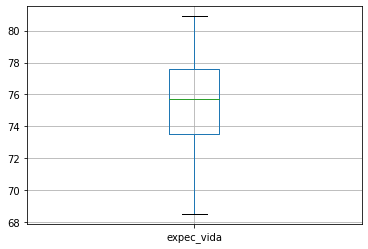

In [9]:
att = 'expec_vida'

dados.boxplot(att)

<AxesSubplot:>

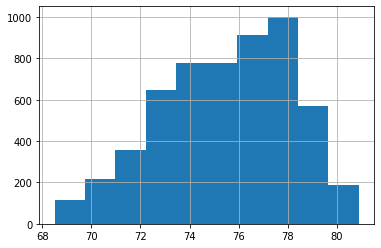

In [10]:
dados[att].hist()

In [11]:
intervalo_idade = np.arange(68, 82, 3)

In [13]:
expec_vida_disc = pd.cut(dados[att], bins=intervalo_idade)

In [14]:
dados.insert(10, 'expec_vida_disc', expec_vida_disc)

In [15]:
dados.head()

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,expec_vida_disc,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,"(71, 74]",19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,"(74, 77]",18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,"(74, 77]",19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,"(71, 74]",19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,"(74, 77]",18.1,661,rural,muito baixa


<AxesSubplot:>

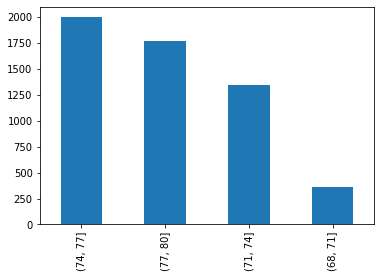

In [19]:
dados['expec_vida_disc'].value_counts().plot(kind='bar')

<AxesSubplot:>

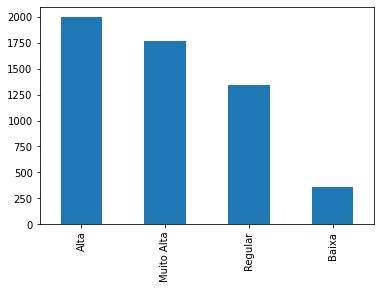

In [24]:
# pode-se também rotular os intervalos (label)

expec_vida_disc_labels = pd.cut(dados['expec_vida'], bins=intervalo_idade, labels=['Baixa', 'Regular', 'Alta', 'Muito Alta'])

expec_vida_disc_labels.value_counts().plot(kind='bar')

Também é muito interessante verificar a distribuição das expectativas de vida por estado

In [25]:
dados.insert(11, 'expec_vida_disc_labels', expec_vida_disc_labels)

In [26]:
dados.head()

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,expec_vida_disc,expec_vida_disc_labels,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,"(71, 74]",Regular,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,"(74, 77]",Alta,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,"(74, 77]",Alta,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,"(71, 74]",Regular,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,"(74, 77]",Alta,18.1,661,rural,muito baixa


In [32]:
dados.groupby('UF').expec_vida_disc_labels.value_counts()

UF                   expec_vida_disc_labels
ACRE                 Alta                       12
                     Regular                    10
ALAGOAS              Regular                    87
                     Baixa                      15
AMAPÁ                Regular                     9
                     Alta                        7
AMAZONAS             Regular                    56
                     Baixa                       6
BAHIA                Regular                   246
                     Alta                      171
CEARÁ                Alta                       97
                     Regular                    87
DISTRITO FEDERAL     Muito Alta                  1
ESPIRITO SANTO       Muito Alta                 76
                     Alta                        2
GOIÁS                Alta                      150
                     Regular                    96
MARANHÃO             Baixa                     191
                     Regular          

Discretização por frequência

- pode-se também realizar a discretização considerando-se um nivelamento das frequências de valores
    - nesse caso, teremos intervalos de amplitudes distintas, mas com frequências niveladas, o que é bom para separar faixas para análise estatística

    - no pandas, podemos utilizar o método qcut(df\[att\], numero_bins, labels = labels)

Agrupamento: muito cuidado ao usar agrupamentos, pois não há muito controle dos ranges discretizados

É fundamental
    
- método de agrupamento utilizado e como ele funciona
    
- entender a métrica de distância utilizada para comparar os exemplos (ex: euclidiana, exponencial, mistura de gaussianas)